In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
df = pd.read_csv("cleaned_data.csv")
df['job_skills'] = df['job_skills'].apply(
    lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list
)

In [3]:
df.reset_index(inplace=True)

In [4]:
df_DA_US = df[(df.job_title_short == "Data Analyst") & (df.job_country == "United States")].copy()

In [5]:
df_DA_US_explode = df_DA_US.explode("job_skills")
df_DA_US_pivot = df_DA_US_explode.pivot_table(
    index="job_posted_month_no",
    columns="job_skills",
    aggfunc="size",
    fill_value=0
)

df_DA_US_pivot.loc["total"] = df_DA_US_pivot.sum()

sorted_columns = df_DA_US_pivot.loc["total"].sort_values(ascending=False).index
df_DA_US_pivot = df_DA_US_pivot[sorted_columns]

df_DA_US_pivot.drop("total" , inplace=True)

In [6]:
Da_total = df_DA_US.groupby("job_posted_month_no").size()
df_likeliHood = df_DA_US_pivot.div(Da_total / 100 , axis=0)

In [7]:
df_likeliHood = df_likeliHood.reset_index()
df_likeliHood["job_posted_month"] = df_likeliHood.job_posted_month_no.apply(
    lambda x : pd.to_datetime(x , format="%m").strftime("%b")
)
df_likeliHood.set_index("job_posted_month" , inplace=True)
df_likeliHood.drop(columns="job_posted_month_no" , inplace=True)


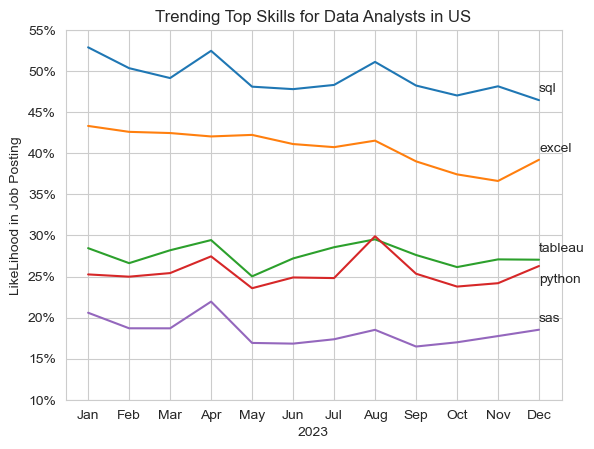

In [12]:
df_plot = df_likeliHood.iloc[:, :5]


sns.set_style(style="whitegrid")
sns.lineplot(data=df_plot , dashes=False, palette="tab10")

plt.title("Trending Top Skills for Data Analysts in US")
plt.ylabel("LikeLihood in Job Posting")
plt.xlabel("2023")
plt.legend().remove()

plt.ylim(10 , 55)

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(len(df_plot.columns)) :
    if df_plot.columns[i] == "python" : 
        plt.text(11, df_plot.iloc[-1 , i] - 2, df_plot.columns[i])
    else :
        plt.text(11, df_plot.iloc[-1 , i] + 1, df_plot.columns[i])

plt.show()
